
# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-de-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**

In [10]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [11]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [12]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [13]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


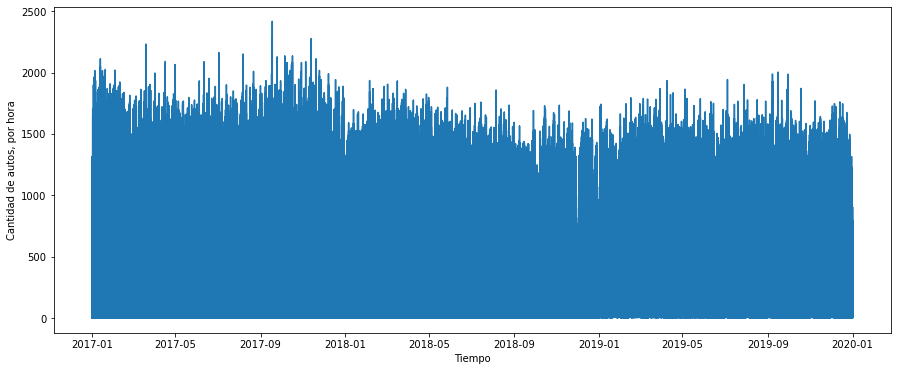

In [14]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [15]:
#Se agrupan los datos por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


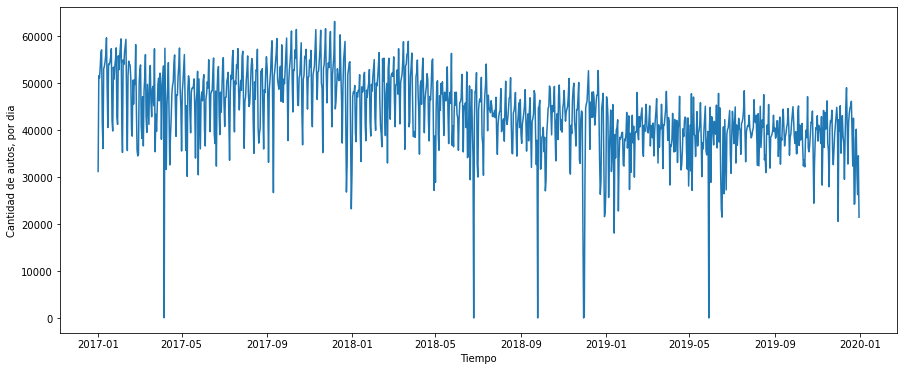

In [16]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

# Análisis Exploratorio de Datos

In [17]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset1 = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset1.estacion=='Illia', dataset1.forma_pago == 'EFECTIVO')
dataset1 = dataset1[mask]

#Quitamos las columnas que no vamos a utilizar
dataset1.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion','hora_fin'], inplace = True)

dataset1.head()

,fecha,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,Martes,Centro,Liviano,537
86,2019-01-01,Martes,Centro,Pesado,1
88,2019-01-01,Martes,Provincia,Liviano,443
94,2019-01-01,Martes,Provincia,Pesado,1
149,2019-01-01,Martes,Centro,Liviano,769


<AxesSubplot:xlabel='dia'>

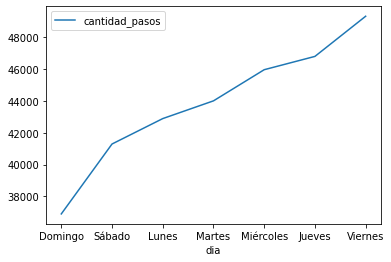

In [18]:
pasos_dia=dataset1.groupby(['fecha','dia']).sum('cantidad_pasos')
pasos_dia.groupby('dia').mean('cantidad_pasos').sort_values('cantidad_pasos').plot()

Con esto se puede evidenciar que el día que tiene un promedio más alto de autos que pasan por la estación Illia y con pago en efectivo son los viernes. Y el día que menos pasos hay con pago en efectivo es el domingo

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels import tsa
import seaborn as sns
sns.set()

In [20]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset2 = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset2.estacion=='Illia', dataset2.forma_pago == 'EFECTIVO')
dataset2 = dataset2[mask]

#Quitamos las columnas que no vamos a utilizar
dataset2.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion',], inplace = True)

dataset2.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [21]:
pasos_dia2=dataset2.groupby(['fecha','hora_fin']).sum('cantidad_pasos')
pasos_dia2.groupby(['hora_fin']).mean('cantidad_pasos').sort_values('cantidad_pasos')

,cantidad_pasos
hora_fin,
4,307.775735
5,378.060662
3,395.126838
2,565.924494
6,718.397978
1,811.741459
0,974.323502
23,1300.814917
7,1437.511949


Esto quiere decir que la hora con mayor cantidad de pasos en promedio son las 18:00 y la hora con menor cantidad de pasos son las 04:00

# Eliminación de datos atípicos

Inicialmente se buscan los datos N/A

In [22]:
print(diario.isna().sum())

cantidad_pasos    0
dtype: int64


In [23]:
diario.cantidad_pasos[diario.cantidad_pasos.isna()]

Series([], Freq: D, Name: cantidad_pasos, dtype: int64)

No hay datos con valores NA, pero existen algunos valores atípicos cercanos a 0 por lo que se define que días con números de pasos inferiores a 10.000 serán imputados

In [24]:
diario.cantidad_pasos[diario.cantidad_pasos<10000]=np.nan

In [25]:
print(diario.isna().sum())

cantidad_pasos    6
dtype: int64


In [26]:
diario.cantidad_pasos[diario.cantidad_pasos.isna()]

fecha
2017-04-06   NaN
2018-06-25   NaN
2018-09-25   NaN
2018-11-30   NaN
2018-12-01   NaN
2019-05-29   NaN
Name: cantidad_pasos, dtype: float64

Revisando los dias outlayer encontramos alguna informacion que explica por que hubo menos de 10 mil pasos en el dia

* 06/04/2017: Sin informacion relevante.
* 25/06/2018: En argentina hay una huelga general [aquí](https://www.infobae.com/politica/2018/06/12/la-cgt-anuncio-un-paro-general-para-el-25-de-junio/)
* 25/09/2018: Huelga Nacional [aquí](https://actualidad.rt.com/actualidad/289703-huelga-nacional-argentina-politicas-economicas-macri)
* 30/11/2018: Feriado Nacional - Cumbre G20 [aquí](https://www.infobae.com/politica/2018/10/30/el-gobierno-decreto-feriado-el-30-de-noviembre-en-la-ciudad-de-buenos-aires-por-la-cumbre-del-g20/)
* 01/12/2018: sin informacion relevante
* 29/05/2019: En argentina hay una huelga general que inmoviliza Buenos Aires [aquí](https://elpais.com/internacional/2019/05/29/argentina/1559153842_024679.html)

Se utiliza la función de interpolate para imputar los valores NaN

In [27]:
# Interpolamos los NA
print(diario.isna().sum())
diario = diario.interpolate()
print(diario.isna().sum())

cantidad_pasos    6
dtype: int64
cantidad_pasos    0
dtype: int64


# Autocorrelación

In [28]:
from statsmodels.tsa.stattools import acf

nlags =  90
autocorr = acf(diario.cantidad_pasos, nlags = nlags)

C:\Users\aleja\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [29]:
autocorr.shape

(91,)

Text(0.5, 0, 'lag')

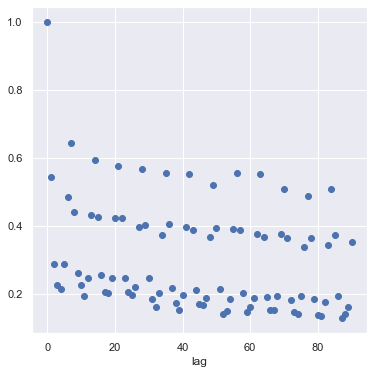

In [30]:
plt.figure(figsize = (6,6))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')

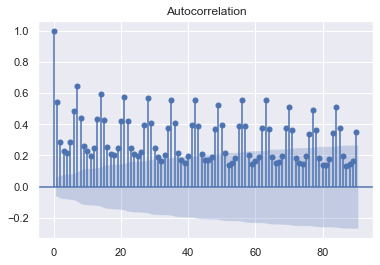

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diario.cantidad_pasos, lags = 90)
plt.show()

# Componentes de la serie

In [32]:
#Pasamos a un formato numerico para saber la tendencia con regresion lineal
diario['fecha_numeros']=diario.index.map(datetime.datetime.toordinal)
diario.head()

,cantidad_pasos,fecha_numeros
fecha,,
2017-01-01,31183.0,736330
2017-01-02,51568.0,736331
2017-01-03,51093.0,736332
2017-01-04,53332.0,736333
2017-01-05,56486.0,736334


In [33]:
# Realizamos regresion lineal
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(diario.fecha_numeros.values.reshape(-1, 1), diario.cantidad_pasos)

LinearRegression()

In [34]:
ventana = int(365*3/7)
diario_rolling = diario.cantidad_pasos.rolling(window=ventana, center = True).mean()
diario_rolling.head

<bound method NDFrame.head of fecha
2017-01-01   NaN
2017-01-02   NaN
2017-01-03   NaN
2017-01-04   NaN
2017-01-05   NaN
              ..
2019-12-27   NaN
2019-12-28   NaN
2019-12-29   NaN
2019-12-30   NaN
2019-12-31   NaN
Freq: D, Name: cantidad_pasos, Length: 1095, dtype: float64>

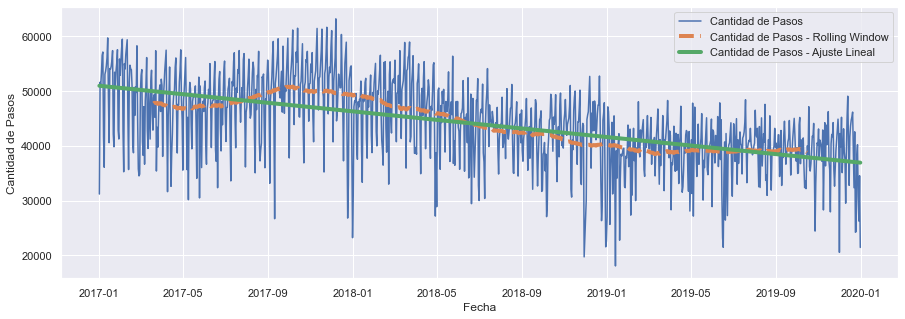

In [35]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad de Pasos')
plt.plot(diario_rolling, ls = '--', lw = 4, label = 'Cantidad de Pasos - Rolling Window')
plt.plot(diario.index, lr.predict(diario.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Cantidad de Pasos - Ajuste Lineal')
#plt.xlim(datetime.date(2017,1,1), datetime.date(2018,1,1))
#plt.ylim([0,30])
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos')
plt.legend()
plt.show()

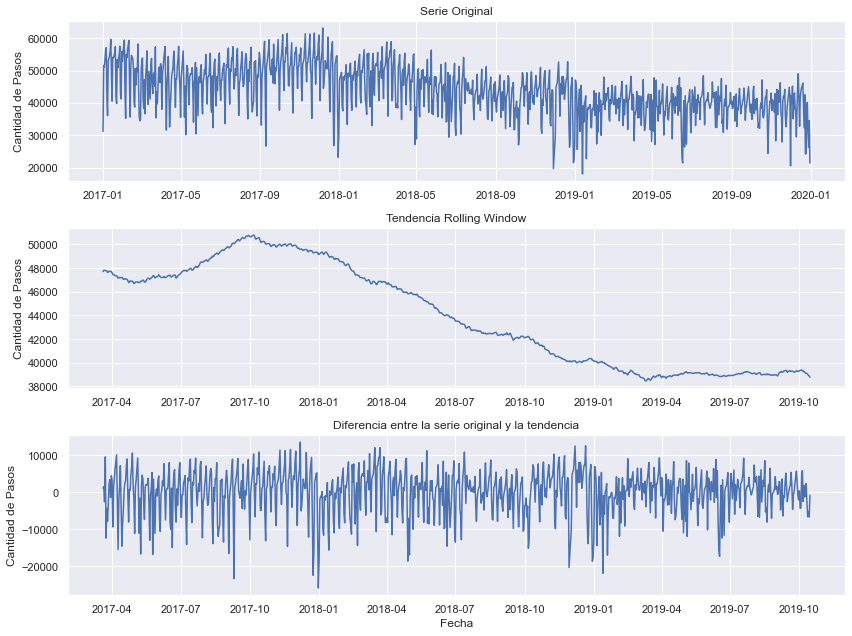

In [36]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(diario.index, diario.cantidad_pasos)
plt.ylabel('Cantidad de Pasos')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window')
plt.plot(diario_rolling)
plt.ylabel('Cantidad de Pasos')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(diario.index, diario.cantidad_pasos - diario_rolling)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos')

plt.tight_layout()
plt.show()


In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(diario.cantidad_pasos, model='additive')
# result.plot()
#pyplot.show()

In [38]:
result.trend

fecha
2017-01-01             NaN
2017-01-02             NaN
2017-01-03             NaN
2017-01-04    48904.285714
2017-01-05    49601.714286
                  ...     
2019-12-27    31197.428571
2019-12-28    30801.285714
2019-12-29             NaN
2019-12-30             NaN
2019-12-31             NaN
Freq: D, Name: trend, Length: 1095, dtype: float64

In [39]:
result.seasonal

fecha
2017-01-01   -6981.054869
2017-01-02   -1099.078371
2017-01-03     146.832228
2017-01-04    1967.807739
2017-01-05    3201.717538
                 ...     
2019-12-27    5222.345743
2019-12-28   -2458.570008
2019-12-29   -6981.054869
2019-12-30   -1099.078371
2019-12-31     146.832228
Freq: D, Name: seasonal, Length: 1095, dtype: float64

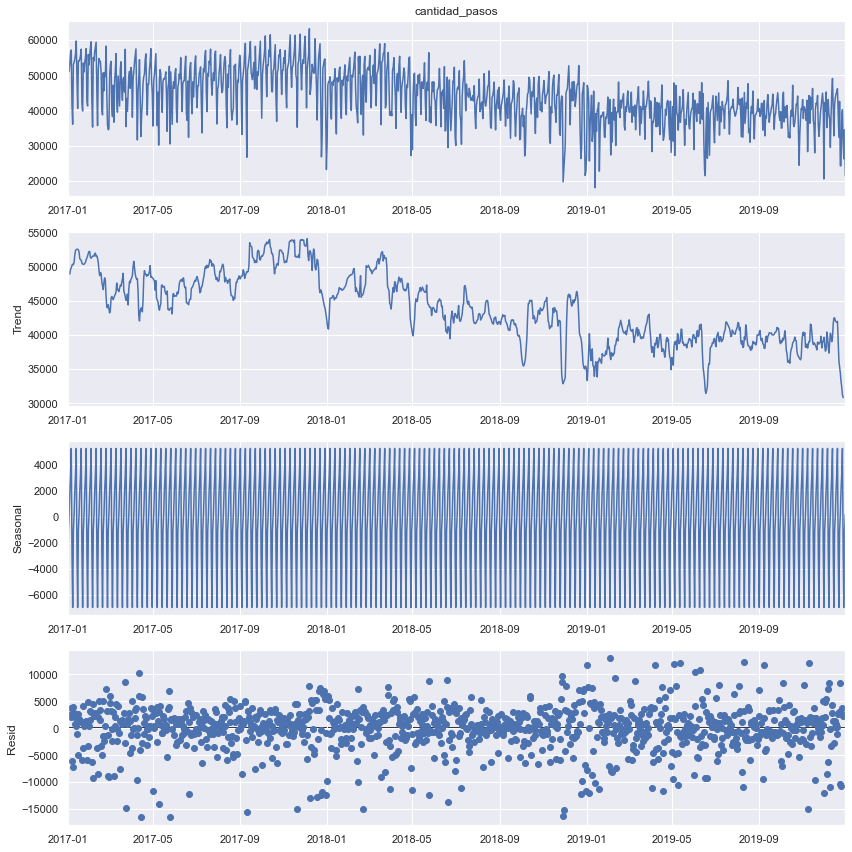

In [40]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

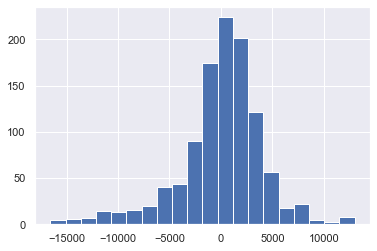

In [41]:
plt.figure(figsize = (6,4))
plt.hist(result.resid, bins = 20)
plt.show()

# Análisis de Tendencia

Análisis de la tendencia del Telepase

In [42]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'TELEPASE')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 

#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)

#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_tp = dataset.resample('D', on = 'fecha').sum()
print(diario_tp.shape)


#Pasamos a un formato numerico para saber la tendencia con regresion lineal
diario_tp['fecha_numeros']=diario_tp.index.map(datetime.datetime.toordinal)
diario_tp.head()

(1095, 1)


,cantidad_pasos,fecha_numeros
fecha,,
2017-01-01,12326,736330
2017-01-02,35621,736331
2017-01-03,39390,736332
2017-01-04,40294,736333
2017-01-05,41373,736334


In [43]:
# Realizamos regresion lineal
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(diario_tp.fecha_numeros.values.reshape(-1, 1), diario_tp.cantidad_pasos)

LinearRegression()

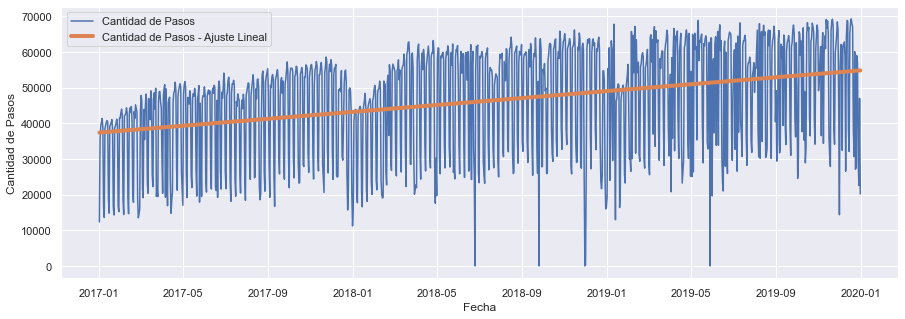

In [44]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario_tp.cantidad_pasos, label = 'Cantidad de Pasos')
#plt.plot(diario_rolling, ls = '--', lw = 4, label = 'Cantidad de Pasos - Rolling Window')
plt.plot(diario.index, lr.predict(diario_tp.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Cantidad de Pasos - Ajuste Lineal')
#plt.xlim(datetime.date(2017,1,1), datetime.date(2018,1,1))
#plt.ylim([0,30])
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos')
plt.legend()
plt.show()

Análisis de la tendencia del peaje Illia

In [45]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = dataset.estacion=='Illia'
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 

#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)

#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_tp = dataset.resample('D', on = 'fecha').sum()
print(diario_tp.shape)


#Pasamos a un formato numerico para saber la tendencia con regresion lineal
diario_tp['fecha_numeros']=diario_tp.index.map(datetime.datetime.toordinal)
diario_tp.head()

(1095, 1)


,cantidad_pasos,fecha_numeros
fecha,,
2017-01-01,45478,736330
2017-01-02,89289,736331
2017-01-03,92602,736332
2017-01-04,95813,736333
2017-01-05,100044,736334


In [46]:
# Realizamos regresion lineal
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(diario_tp.fecha_numeros.values.reshape(-1, 1), diario_tp.cantidad_pasos)

LinearRegression()

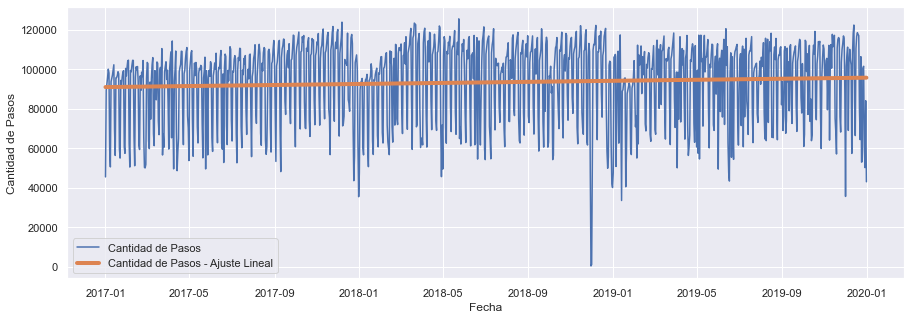

In [47]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario_tp.cantidad_pasos, label = 'Cantidad de Pasos')
#plt.plot(diario_rolling, ls = '--', lw = 4, label = 'Cantidad de Pasos - Rolling Window')
plt.plot(diario.index, lr.predict(diario_tp.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Cantidad de Pasos - Ajuste Lineal')
#plt.xlim(datetime.date(2017,1,1), datetime.date(2018,1,1))
#plt.ylim([0,30])
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos')
plt.legend()
plt.show()

Como conclusión se puede evidenciar que la cantidad de vehículos que pasan en el peaje Illia se mantiene en el tiempo. Sin embargo, al analizar la tendencia por tipo de pago, se encuentra que "Efectivo" disminuye, mientras que "Telepase" aumenta durante el tiempo que fue objeto de análisis.

# Predicción

In [48]:
senial = diario.cantidad_pasos
senial.head()

fecha
2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
Freq: D, Name: cantidad_pasos, dtype: float64

Se toman 60 días hacia atrás

In [49]:
look_back = 60

In [50]:
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1034, 60) (1034,)


In [51]:
for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [52]:
print(X)

[[31183. 51568. 51093. ... 34497. 34825. 49891.]
 [51568. 51093. 53332. ... 34825. 49891. 52832.]
 [51093. 53332. 56486. ... 49891. 52832. 53876.]
 ...
 [37630. 40527. 40159. ... 24349. 38168. 40182.]
 [40527. 40159. 43053. ... 38168. 40182. 30681.]
 [40159. 43053. 37655. ... 40182. 30681. 26259.]]


In [53]:
print(y)

[52832. 53876. 40755. ... 30681. 26259. 34523.]


In [54]:
N_train = int(X.shape[0]*.80) - look_back  # cantidad de instancias que vamos a usar para entrenar. 
N_test = int(X.shape[0]*.20) #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(767, 60) (767,)
(206, 60) (206,)


### Random Forest

Se entrena un modelo Random Forest Regressor para predecir

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

A través del siguiente gráfico se observa la información que está utilizando el modelo para predecir

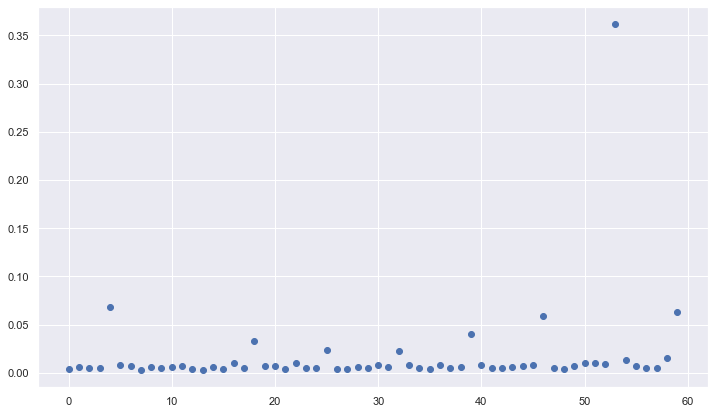

In [56]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
#for x in np.arange(3)*60:
#     plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

La variable más importante que usa el modelo para predecir es la cantidad de paso de vehículos de 7 días atrás.

In [57]:
# Se definen la bases de prediccion
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

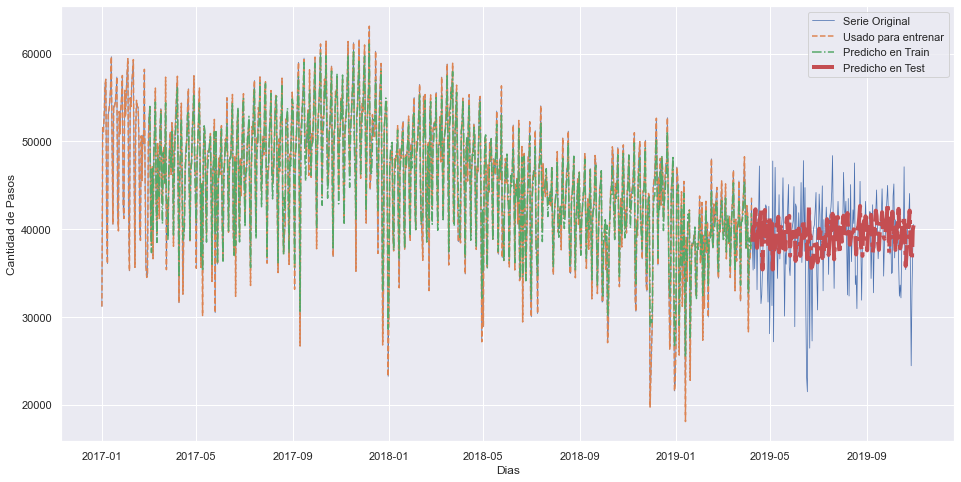

In [58]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Dias')
plt.ylabel('Cantidad de Pasos')
plt.show()

Como métrica se utiliza el RMSE, con el fin de evaluar los modelos dados, ya que tiene una penalización alta en los errores grandes

In [59]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 1834.9244704498701
Error en Test: 4503.54787174345


Dado que hay una gran diferencia entre el RMSE de train y el de test, se tiene un indicio de un sobre ajuste

### Modelo Benchmark

Se construye un modelo benchmark utilizando la diferencia de 7 días

In [60]:
y_test_pred_benchmark = y[-7 + N_train:N_train+N_test - 7]

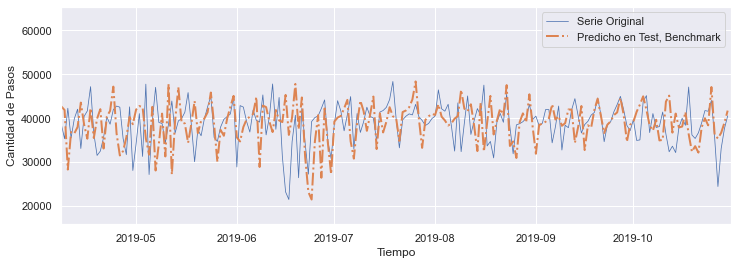

In [61]:
plt.figure(figsize=(12,4))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(senial.index[N_train+look_back], senial.index[length_total])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.legend()
plt.show()

In [62]:
y_test_pred_benchmark = y[-7 + N_train:N_train+N_test - 7]
MSE = mean_squared_error(y_test, y[-7 + N_train:N_train+N_test - 7])
print(np.sqrt(MSE))

5985.203597164808


Se puede observar que el modelo mejora un poco la predicción sobre el benchmark en el conjunto de test

### Optimización de hiperparámetros

Se busca optimizar los hiperparámetros del modelo Random Forest Regressor usando un RandomizedSearch

In [63]:
from sklearn.model_selection import RandomizedSearchCV

param_gridrforest = {'n_estimators':[100, 400, 800],
"max_depth":[10, 50, 100, None],
'min_samples_split':[2, 5, 9],
'min_samples_leaf':[1, 2, 3]}

In [64]:
REG_rforest=RandomForestRegressor()

In [65]:
rf_randomrforest = RandomizedSearchCV(REG_rforest, param_gridrforest, n_iter = 25, verbose=2, cv = 3, random_state=42, n_jobs = -1,scoring='neg_mean_squared_error')

In [66]:
rf_randomrforest.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  1.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 50, 100, None],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 5, 9],
                                        'n_estimators': [100, 400, 800]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [67]:
print("Mejores parametros: "+str(rf_randomrforest.best_params_))
print("Mejor Score: "+str(np.sqrt(rf_randomrforest.best_score_*-1))+'\n')

Mejores parametros: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 50}
Mejor Score: 4977.688366938388



Luego de optimizar los hiperparámetros se ejecuta el modelo:

In [68]:
rf_opti = RandomForestRegressor(n_estimators= 400, min_samples_split= 5, min_samples_leaf=1, max_depth=10, n_jobs = 4).fit(X_train,y_train)

In [69]:
# Se definen la bases de prediccion
y_pred_opti = rf_opti.predict(X)
y_train_pred_opti = rf_opti.predict(X_train)
y_test_pred_opti = rf_opti.predict(X_test)

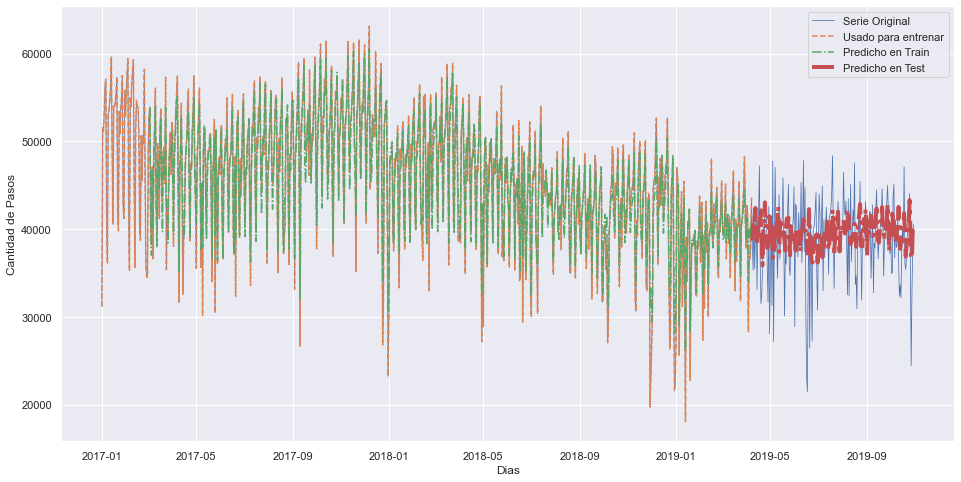

In [70]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred_opti,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_opti,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Dias')
plt.ylabel('Cantidad de Pasos')
plt.show()

In [71]:
MSE = mean_squared_error(y_train, y_train_pred_opti)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred_opti)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 2188.8132257695156
Error en Test: 4501.425577620946


Se evidencia que al utilizar los hiperparámetros optimizados disminuye el RMSE para test y se incrementa para train; esto hace que se disminuya un poco el sobre ajuste

### Modelo de Regresión Lineal

In [72]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [73]:
y_train_lr = lr.predict(X_train)
y_test_lr = lr.predict(X_test)

In [74]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_lr))
print(f'Raíz del error cuadrático medio en Train de RL: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test de RL: {rmse_test}')

Raíz del error cuadrático medio en Train de RL: 4509.1898133336135
Raíz del error cuadrático medio en Test de RL: 4733.09813776061


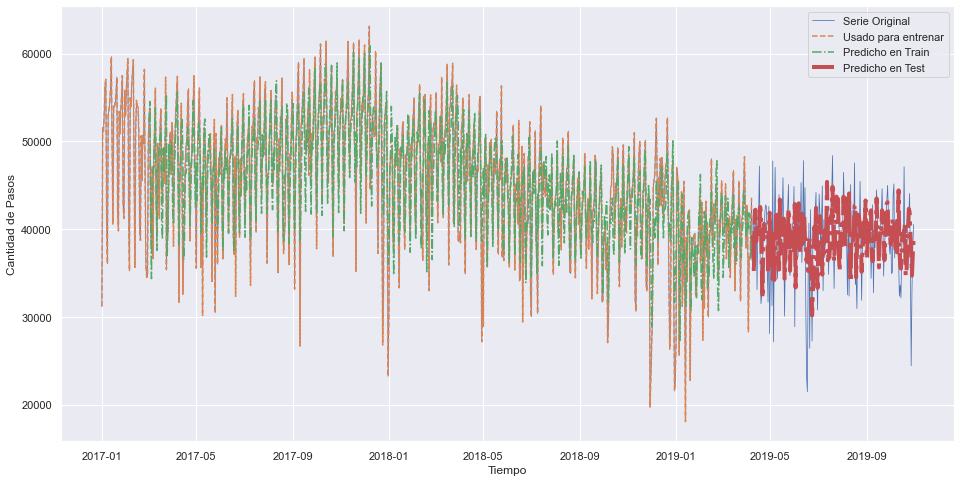

In [75]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_lr,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_lr,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

Al comparar el modelo RandomForestRegressor original, el modelo benchmark y el RandomForestRegressor con los hiperparámteros optimizados, el mejor predictor sería el último modelo, dado que logra disminuir el RMSE y el sobre ajuste.

Adicionalmente, al comparar con el modelo de regresión lineal se evidencia que este tiene mayor RMSE, pero menor sobre ajuste.

Por lo tanto se selecciona el modelo RandomForestRegressor con los hiper parámetros optimizados

#### Predicción 2020

In [76]:
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')

In [77]:
data_2020.info()
data_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         float64
 1   fecha           object 
 2   mes             object 
 3   dia             object 
 4   dia_fecha       float64
 5   hora_inicio     float64
 6   hora_fin        float64
 7   estacion        object 
 8   tipo_vehiculo   object 
 9   forma_pago      object 
 10  observacion     object 
 11  sentido         object 
 12  cantidad_pasos  float64
dtypes: float64(5), object(8)
memory usage: 251.3+ MB


,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


In [78]:
print(data_2017['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2019['estacion'].unique())
print(data_2020['estacion'].unique())

['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']


In [79]:
print(data_2017['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2019['sentido'].unique())
print(data_2020['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [80]:
print(data_2017['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2019['tipo_vehiculo'].unique())
print(data_2020['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Auto' 'Auto con trailer' 'Moto' 'N/D' 'Pago Doble Auto'
 'Pago Doble Auto con trailer / Pesado 2 Ejes' 'Pago doble Moto'
 'Pesados 2 Ejes' 'Pesados 3 Ejes' 'Pesados 4 Ejes' 'Pesados 5 Ejes'
 'Pesados 6 Ejes']


In [81]:
print(data_2017['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2019['forma_pago'].unique())
print(data_2020['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP' 'Mercado Pago']


In [82]:
# Modificamos el nombre de las estaciones para que concuerde con la base anterior
data_2020.estacion=data_2020.estacion.str.capitalize()

In [83]:
# Modificamos la forma de pago para que concuerde con la anterior base
data_2020.forma_pago=data_2020.forma_pago.str.upper()

In [84]:
data_2020.drop(columns = ['dia_fecha','observacion','mes'], inplace = True)

In [85]:
#Unimos los 4 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset20 = pd.concat([data_2020,data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset20.estacion=='Illia', dataset20.forma_pago == 'EFECTIVO')
dataset20 = dataset20[mask]

#Quitamos las columnas que no vamos a utilizar
dataset20.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset20.head()

,fecha,dia,hora_fin,tipo_vehiculo,sentido,cantidad_pasos
52,2020-01-01 00:00:00,Miércoles,1.0,Auto,Centro,326.0
53,2020-01-01 00:00:00,Miércoles,1.0,Auto,Provincia,319.0
134,2020-01-01 00:00:00,Miércoles,2.0,Auto,Centro,199.0
135,2020-01-01 00:00:00,Miércoles,2.0,Auto,Provincia,180.0
202,2020-01-01 00:00:00,Miércoles,3.0,Auto,Centro,114.0


In [86]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset20['fecha2'] = pd.to_datetime(dataset20.fecha) + pd.to_timedelta(dataset20.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset20.drop(columns=['fecha','hora_fin'], inplace = True)

dataset20.head()

,dia,tipo_vehiculo,sentido,cantidad_pasos,fecha2
52,Miércoles,Auto,Centro,326.0,2020-01-01 01:00:00
53,Miércoles,Auto,Provincia,319.0,2020-01-01 01:00:00
134,Miércoles,Auto,Centro,199.0,2020-01-01 02:00:00
135,Miércoles,Auto,Provincia,180.0,2020-01-01 02:00:00
202,Miércoles,Auto,Centro,114.0,2020-01-01 03:00:00


In [87]:
#Corregimos el nombre de fecha2 a fecha
dataset20.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset20.head()

,dia,tipo_vehiculo,sentido,cantidad_pasos,fecha
52,Miércoles,Auto,Centro,326.0,2020-01-01 01:00:00
53,Miércoles,Auto,Provincia,319.0,2020-01-01 01:00:00
134,Miércoles,Auto,Centro,199.0,2020-01-01 02:00:00
135,Miércoles,Auto,Provincia,180.0,2020-01-01 02:00:00
202,Miércoles,Auto,Centro,114.0,2020-01-01 03:00:00


In [88]:
#Reordenamos el dataset por fecha
dataset20.sort_values('fecha', inplace = True)
dataset20.reset_index(drop=True, inplace = True)
dataset20

,dia,tipo_vehiculo,sentido,cantidad_pasos,fecha
0,Domingo,Pesado,Centro,1.0,2017-01-01 00:00:00
1,Domingo,Pesado,Centro,21.0,2017-01-01 00:00:00
2,Domingo,Pesado,Centro,10.0,2017-01-01 00:00:00
3,Domingo,Pesado,Centro,1.0,2017-01-01 00:00:00
4,Domingo,Liviano,Centro,857.0,2017-01-01 00:00:00
...,...,...,...,...,...
291238,Jueves,Auto con trailer,Centro,1.0,2020-12-31 20:00:00
291239,Jueves,Auto,Provincia,106.0,2020-12-31 21:00:00
291240,Jueves,Auto,Centro,103.0,2020-12-31 21:00:00
291241,Jueves,Moto,Centro,5.0,2020-12-31 21:00:00


In [89]:
mask=dataset20['fecha']<='2020-05-30'

In [90]:
dataset20=dataset20[mask]

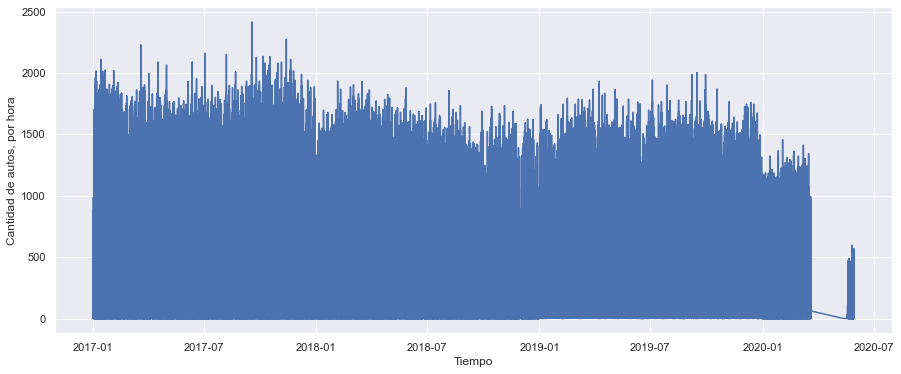

In [91]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset20.fecha, dataset20.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [92]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario20 = dataset20.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 2)


,cantidad_pasos,fecha_numeros
fecha,,
2017-01-01,31183.0,736330
2017-01-02,51568.0,736331
2017-01-03,51093.0,736332
2017-01-04,53332.0,736333
2017-01-05,56486.0,736334


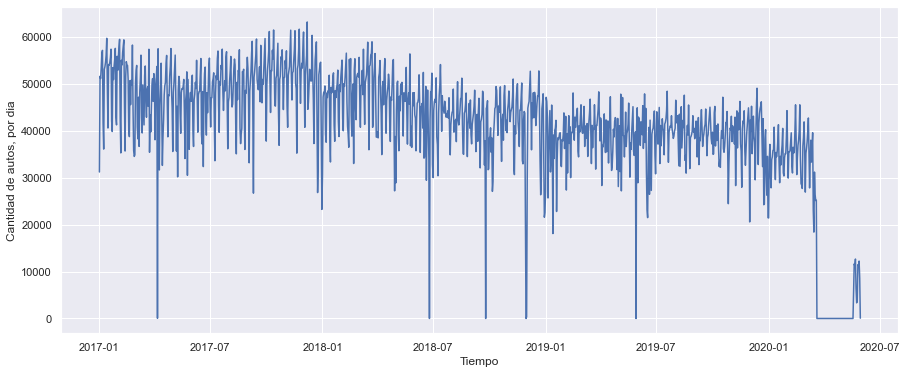

In [93]:
plt.figure(figsize = (15,6))
plt.plot(diario20.index, diario20.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [94]:
#Quitamos los valores outlayer
diario20.cantidad_pasos[diario20.cantidad_pasos<10000]=np.nan

In [95]:
#Interpolamos los NA
diario20 = diario20.interpolate()

#### Proyección Trim1 2020

In [96]:
senial20 = diario20.cantidad_pasos
senial20.head()

fecha
2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
Freq: D, Name: cantidad_pasos, dtype: float64

In [97]:
look_back20 = 60

In [98]:
N = senial20.shape[0]
X = np.zeros((N - look_back20 - 1,look_back20))
y = np.zeros(N - look_back20 - 1)
print(X.shape, y.shape)

(1185, 60) (1185,)


In [99]:
for i in range(X.shape[0]):
    X[i,:] = senial20.iloc[i:i+look_back20]
    y[i] = senial20.iloc[i+look_back20]

In [100]:
N_train = int(X.shape[0]*.90) - look_back20  # cantidad de instancias que vamos a usar para entrenar. 
N_test = int(X.shape[0]*.10) #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back20

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(1006, 60) (1006,)
(118, 60) (118,)


In [101]:
# Se definen la bases de prediccion
y_pred_opti_20 = rf_opti.predict(X)
y_train_pred_opti_20 = rf_opti.predict(X_train)
y_test_pred_opti_20 = rf_opti.predict(X_test)

In [102]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_opti_20))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_opti_20))
print(f'Raíz del error cuadrático medio en Train de RL: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test de RL: {rmse_test}')

Raíz del error cuadrático medio en Train de RL: 2940.5339108214134
Raíz del error cuadrático medio en Test de RL: 6112.715383975816


#### Conclusión

El modelo RandomForestRegressor con hiperparámetros optimizados con el que se predijo el Trim 1 2020 muestra un incremento en el RMSE, el cual es un comportamiento esperado por la situación sanitaria mundial derivada de la pandemia con cuarentenas obligatorias, esto hizo que redujera significativa del flujo vehicular. Esto hace que el año 2020 sea atípico para cualquier predicción dado que fue atípico en todos los sectores.

# Proyecto 4: Aplicar Prophet al proyecto 3 de series de tiempo

Se quiere aplicar el modelo Prophet desarrollado por facebook para comparar los resultados obtenidos con el modelo más óptimo del proyecto 3. Se utiliza este modelo dado que requiere menos esfuerzo, recursos y tiempo para obtener un desempeño similar a modelos que toman más tiempo de pre-procesamiento y ejecución

In [103]:
pip install prophet

In [104]:
#Importamos la libreria Prophet

from prophet import Prophet
import pandas as pd
m_diario = Prophet(daily_seasonality=True)

Importing plotly failed. Interactive plots will not work.


In [105]:
# Armamos un nuevo dataset que tenga los valores dia a dia
diario20.tail()

,cantidad_pasos
fecha,
2020-05-26,11443.0
2020-05-27,11250.0
2020-05-28,12219.0
2020-05-29,12219.0
2020-05-30,12219.0


In [106]:
# Para que no salte un warning
pd.options.mode.chained_assignment = None

In [107]:
#Construimos el dataframe
df_prophet = pd.DataFrame()
df_prophet['ds'] = diario20.index
df_prophet['y'] = diario20.cantidad_pasos.values

In [108]:
#Dejamos los años 2017 a 2019 para entrenar
df_prophet=df_prophet[df_prophet['ds']<'2020-01-01']

In [109]:
df_prophet.tail()

,ds,y
1090,2019-12-27,40182.0
1091,2019-12-28,30681.0
1092,2019-12-29,26259.0
1093,2019-12-30,34523.0
1094,2019-12-31,21447.0


In [110]:
df_prophet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 0 to 1094
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1095 non-null   datetime64[ns]
 1   y       1095 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 25.7 KB


In [111]:
# Fiteamos el modelo
m_diario.fit(df_prophet)

21:37:20 - cmdstanpy - INFO - Chain [1] start processing
21:37:40 - cmdstanpy - INFO - Chain [1] done processing


In [112]:
m_diario

In [113]:
# Creamos la base para predecir 90 dias a futuro
future = m_diario.make_future_dataframe(periods=90)
future.tail()

,ds
1180,2020-03-26
1181,2020-03-27
1182,2020-03-28
1183,2020-03-29
1184,2020-03-30


In [114]:
forecast_diario = m_diario.predict(future)

In [115]:
forecast_diario[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1180,2020-03-26,40069.465932,33973.189309,46539.434504
1181,2020-03-27,42019.388263,35615.177064,47681.254961
1182,2020-03-28,34253.552616,28469.996344,40099.366379
1183,2020-03-29,29609.522779,23645.417664,35392.568847
1184,2020-03-30,35515.860507,29412.625698,41720.325319


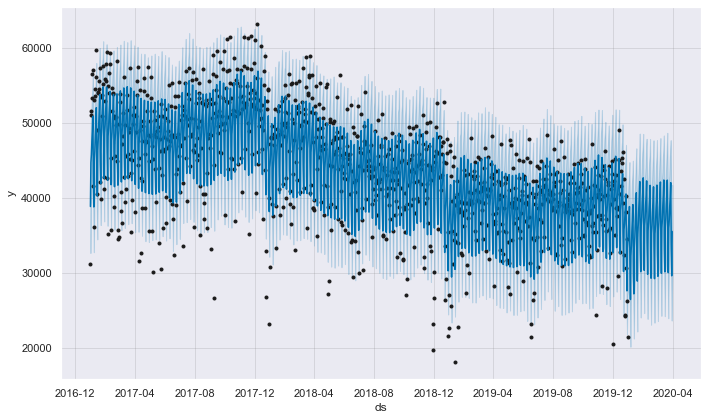

In [116]:
#Graficamos la proyeccion de Prophet
fig3 = m_diario.plot(forecast_diario)

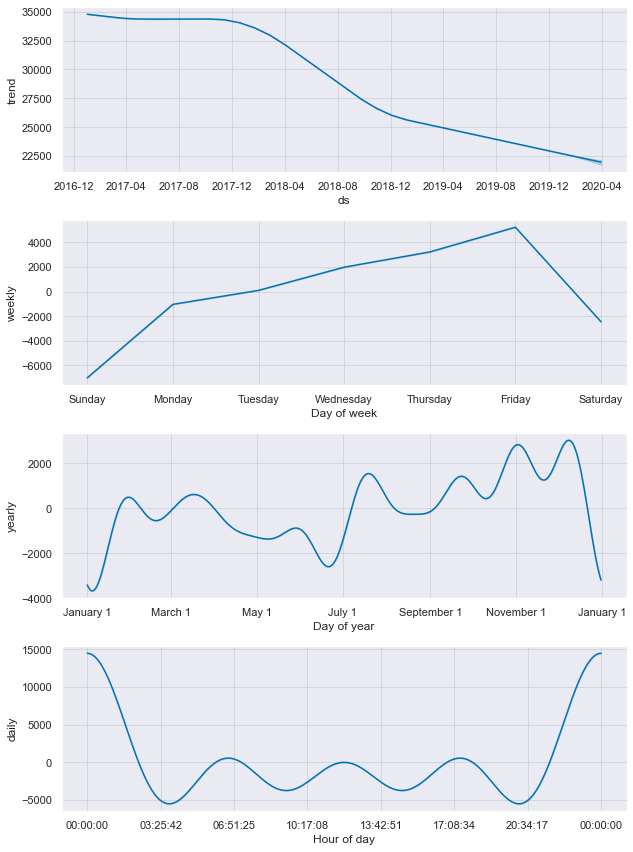

In [117]:
# Graficamos los componentes de la serie
fig4 = m_diario.plot_components(forecast_diario)

In [118]:
# Agregamos la cantidad de pasos original para poder calcular el RMSE
forecast_completo = pd.merge(left=forecast_diario,right=diario20, how='left', left_on='ds', right_on=diario20.index)

In [119]:
forecast_completo.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,cantidad_pasos
1180,2020-03-26,21995.297424,33973.189309,46539.434504,21781.890623,22179.479226,18074.168508,18074.168508,18074.168508,14489.994824,...,3222.065207,3222.065207,362.108476,362.108476,362.108476,0.0,0.0,0.0,40069.465932,23643.258065
1181,2020-03-27,21987.119940,35615.177064,47681.254961,21767.814610,22174.021232,20032.268323,20032.268323,20032.268323,14489.994824,...,5237.124333,5237.124333,305.149166,305.149166,305.149166,0.0,0.0,0.0,42019.388263,23424.580645
1182,2020-03-28,21978.942456,28469.996344,40099.366379,21754.979021,22171.496946,12274.610160,12274.610160,12274.610160,14489.994824,...,-2459.099081,-2459.099081,243.714417,243.714417,243.714417,0.0,0.0,0.0,34253.552616,23205.903226
1183,2020-03-29,21970.764972,23645.417664,35392.568847,21742.961756,22167.927132,7638.757807,7638.757807,7638.757807,14489.994824,...,-7029.591629,-7029.591629,178.354612,178.354612,178.354612,0.0,0.0,0.0,29609.522779,22987.225806
1184,2020-03-30,21962.587488,29412.625698,41720.325319,21729.296224,22163.974695,13553.273019,13553.273019,13553.273019,14489.994824,...,-1046.386141,-1046.386141,109.664336,109.664336,109.664336,0.0,0.0,0.0,35515.860507,22768.548387


In [120]:
#Definimos la base de Train para le calculo del RMSE
forecast_train=forecast_completo[forecast_completo['ds']<'2020-01-01']

In [121]:
#Definimos la base de Test para le calculo del RMSE
forecast_test=forecast_completo[forecast_completo['ds']>='2020-01-01']

In [122]:
#Calculamos el RMSE Train
se_train = np.square(forecast_train.loc[:, 'yhat'] - forecast_train.loc[:, 'cantidad_pasos'])
mse_train = np.mean(se_train)
rmse_train = np.sqrt(mse_train)
print(rmse_train)

4739.755323539539


In [123]:
#Calculamos el RMSE Test
se_test = np.square(forecast_test.loc[:, 'yhat'] - forecast_test.loc[:, 'cantidad_pasos'])
mse_test = np.mean(se_test)
rmse_test = np.sqrt(mse_test)
print(rmse_test)

6131.8200836947435


#### Conclusión

Al utilizar el modelo Prophet se obtiene menor sobre ajuste que el mejor modelo seleccionado en el proyecto 3, y un RMSE muy parecido en test. Dado que Prophet requerie menor pre-procesamiento y menores recursos, se selecciona este modelo para predecir la cantidad de vehículos que pasan por el peaje de Illia con pago en efectivo.